In [1]:
%matplotlib notebook

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Number of labels: 257


<IPython.core.display.Javascript object>


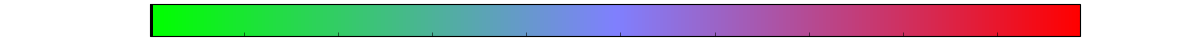

In [2]:
from genelife import *

## Initialization

See additional discussion in the [genelife wiki](https://github.com/js1200/genelife/wiki/Probability-parameters-in-genelife).

The code determining the effect of genes on birth, and the mutation of genomes is currently on lines 229-242 of `subgene.c`.

* param `rulemod=1` => genetically alteration of GOL rule kicks in

Possible replication schemes for case of 2 live nbrs:

* `selection == 0` larger integer value determines survival
* `selection == 1` paper scissors stone well on bottom 2 bits of N1(g0), N1(g1).
* `selection == 2` compete model (Norman) : mutual and distances to 0 all less than ncoding
* `selection == 3` selection based on closeness to one of the two difft targets (ncoding bits apart)
* `selection == 4` selection based on closeness of g0 to 0x0 and g1 to all 1's; for birth distances must satisfy `d0<ncoding`, `d1<ncoding`, and `dd=D(g0,g1) < ncoding.`  `ncoding>55` for any exceptions.
* `selection == 5` Predator prey: prey goes toward all 0's, predator goes toward all 1's.  N1(g)<32 => prey; birth if different and at least one prey; both prey => prey with less 1's wins, prey-predator => predator wins.

* param `nlog2pmut` fixes mutation probability



Number of labels: 257


<IPython.core.display.Javascript object>


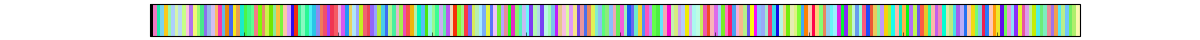

In [16]:
# type = 'grad', 'bright', 'soft'  ; default='grad'
my_cmap = rand_cmap(257, type='bright', first_color_black=True, last_color_black=False, verbose=True)
#my_cmap = rand_cmap(257, type='grad', first_color_black=True, last_color_black=False, verbose=True)

In [17]:
offsets = [[0,0,0],
           [-1, -1, 0],
           [0, -1, 0],
           [1, -1, 0],
           [1, 0, 0],
           [1, 1, 0],
           [0, 1, 0],
           [-1, 1, 0],
           [-1, 0, 0]]
numHis = pow(2,len(offsets))
histo=np.zeros(numHis,np.uint64)
flatoff =  [x for sublist in offsets for x in sublist]
npoffsets = np.array(flatoff,np.int32)

runparams = np.zeros(5,np.int32)
simparams = np.zeros(5,np.int32)    # 5 parameters passed to C

In [18]:
len(runparams)

5

Note:  to get the nices possible display, go to the [this site ](http://www.infobyip.com/detectmonitordpi.php) to set `my_dpi` in the next cell properly for your display.

In [19]:
# for my_dpi go to http://www.infobyip.com/detectmonitordpi.php
my_dpi=102.4

Following animation cell is set up to display for `ndisp` time steps, run without display for `nskip` time steps, and repeat, up to a total of `niter*ndisp` frames displayed (`niter*(ndisp+nskip)` total time steps):

|---`ndisp`---|------------------`nskip`---------------| ... repeated for `niter` times


In [20]:
#def doanimation(nrun=1,ndisp=1000,niter=1):    
cnt=0
#fig, ax = plt.subplots(figsize=(10,10))
#fig, ax = plt.subplots(figsize=((3*256)/my_dpi, (3*256)/my_dpi), dpi=my_dpi, frameon=False)
#ax.axis('off')

colorgrid(N)
def update_anim(data):
    global gol, cgrid
    global golg
    global log2N
    global simparams
    global cnt
    global framenr
    global mat
    cnt = cnt+1
    if cnt % ndisp == 0:  # insert the non-displayed iterations
        genelife.genelife_update(nskip, 0)  
        framenr = framenr + nskip
        genelife.countspecies(gol,golg,runparams)
    genelife.genelife_update(nrun, 0)
    genelife.get_curgol(gol)
    genelife.get_curgolg(golg)
    framenr = framenr+nrun
    colorgrid(N)
    mat.set_data(cgrid)
    time_text.set_text('cnt = %.1d' % framenr)
    time_text.set_color('w')
    return mat


In [37]:
nrun=1; nskip = 900; ndisp=100; niter=10;  # changed from niter 10 just for quicker exploration
rulemod = runparams[0] = 1               # 0,1 whether to allow GoL rule modifications
repscheme = runparams[1] = 0             # 3 or 4, if 3 then choose lowest bit position, if 4 choose most different
selection = runparams[2] = 0             # fitness for 2 live neighbor rule : 0-5 see subgenelife.c code
overwritemask = runparams[3] = 0         # mask of 2 bits to overwrite instead of survival for 3(bit0) or 2(bit1) live nbs
survival = runparams[4] = 3              # survive mask for two (bit 1) and three (bit 0) live neighbours : GoL = 3

nlog2pmut = simparams[0] = 9             # gene mutation probability
initial1density = simparams[1] = 16384   # initial 1 density in GOL state
                                         # 16384 = nearest to half of guaranteed C rand max value 32767 = 2**15 - 1
initialrdensity = simparams[2] = 0       # initial density of random genes
ncoding = simparams[3] = 65              # no of bits used to encode valid connection functions 1-16
startgenechoice = simparams[4] = 8       # initialize genes to startgene number 0-8 : 8 is random choice of 0-7

genelife.initialize_planes(npoffsets)
genelife.initialize(runparams,simparams)
framenr = 0
cnt=0

In [39]:
cgrid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)

<IPython.core.display.Javascript object>


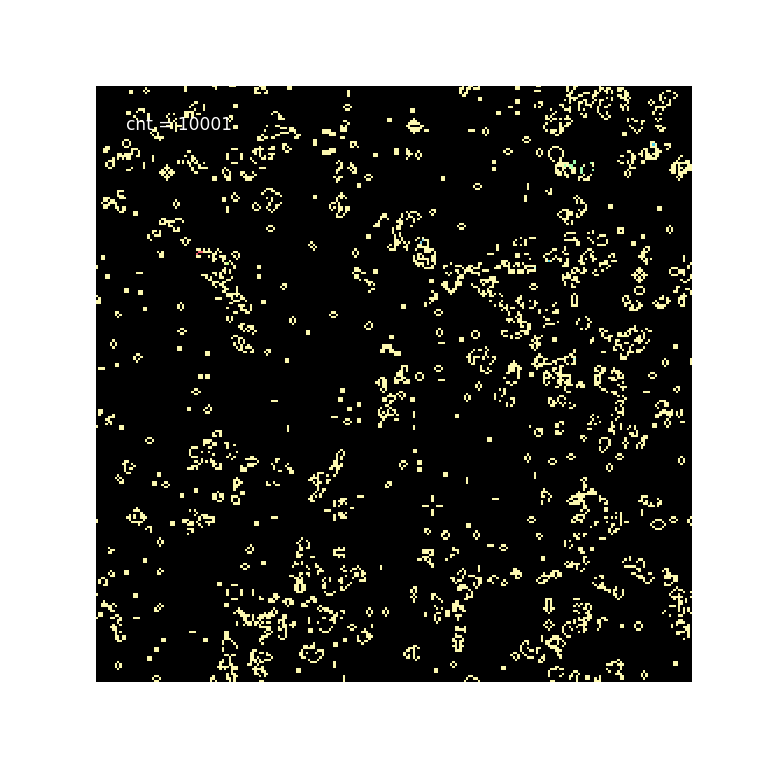

In [38]:
fig, ax = plt.subplots(figsize=((3*256)/my_dpi, (3*256)/my_dpi), dpi=my_dpi, frameon=False)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
ax.axis('off')
# mat = ax.matshow(cgrid, cmap=my_cmap, vmin=0.01, vmax=257)  # was vmax = LEN+1
mat = ax.matshow(cgrid, cmap=my_cmap, vmin = 0, vmax = 56)
ani = animation.FuncAnimation(fig, update_anim, interval=60, # ~60 ms to see every time step
                              save_count=0, frames=niter*ndisp, repeat = False)
plt.show()

In [12]:
genelife.countspecies(gol,golg,runparams)

## Look only at initial condition:

In [8]:
nrun=1; nskip = 1; ndisp=400; niter=4;  # changed from niter 10 just for quicker exploration
rulemod = runparams[0] = 1               # 0,1 whether to allow GoL rule modifications
repscheme = runparams[1] = 0             # 3 or 4, if 3 then choose lowest bit position, if 4 choose most different
selection = runparams[2] = 0             # fitness for 2 live neighbor rule : 0-5 see subgenelife.c code
overwritemask = runparams[3] = 3         # mask of 2 bits to overwrite instead of survival for 3(bit0) or 2(bit1) live nbs
survival = runparams[4] = 0              # survive mask for two (bit 1) and three (bit 0) live neighbours : GoL = 3

nlog2pmut = simparams[0] = 9             # gene mutation probability
initial1density = simparams[1] = 16384   # initial 1 density in GOL state
                                         # 16384 = nearest to half of guaranteed C rand max value 32767 = 2**15 - 1
initialrdensity = simparams[2] = 0       # initial density of random genes
ncoding = simparams[3] = 65              # no of bits used to encode valid connection functions 1-16
startgenechoice = simparams[4] = 8       # initialize genes to startgene number 0-8 : 8 is random choice of 0-7

genelife.initialize_planes(npoffsets)
genelife.initialize(runparams,simparams)
framenr = 0
cnt=0
genelife.get_curgol(gol)
genelife.get_curgolg(golg)

In [13]:
cgrid


array([[  0,   0,   0, ...,   0,   0,   0],
       [146,   0,   0, ...,   0, 146,   0],
       [  0,   0,   0, ...,  58,   0,  58],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,  58,  58, ...,   0,   0,  58],
       [  0, 146,  58, ..., 146,  58, 146]], dtype=uint64)

<IPython.core.display.Javascript object>


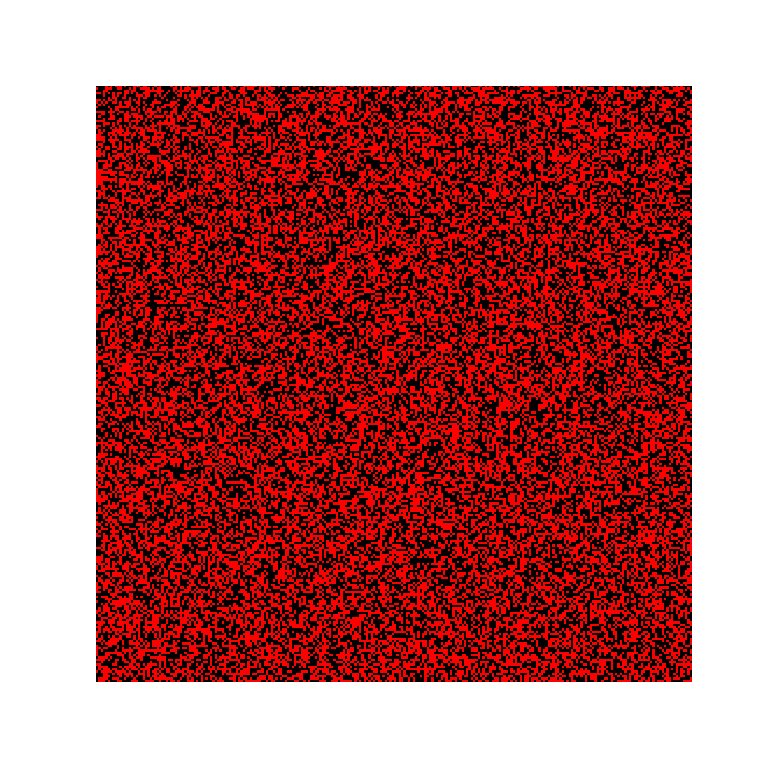

In [11]:
fig, ax = plt.subplots(figsize=((3*256)/my_dpi, (3*256)/my_dpi), dpi=my_dpi, frameon=False)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
ax.axis('off')
# mat = ax.matshow(cgrid, cmap=my_cmap, vmin=0.01, vmax=257)  # was vmax = LEN+1
mat = ax.matshow(cgrid, cmap=my_cmap, vmin = 0, vmax = 56)
colorgrid(N)
plt.show()

### Check initial gol, golg

In [8]:
genelife.get_curgol(gol)

In [ ]:
sum(gol)

In [9]:
genelife.get_curgolg(golg)

In [ ]:
foo = [int(golg[i]>0) for i in range(len(golg))]
sum(foo)